In [2]:
import pickle 
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D
import seaborn as sns
sns.set_theme()
import math
import pandas as pd

In [17]:
stat_df = pd.read_csv(Path(Path.home(), "Documents/xray/sample_bench/data/3ca7/66_native_1x/score_analysis.csv"))
rmsd_df = pd.read_csv(Path(Path.home(), "Documents/xray/dev/17_synthetic_native/data/scores/1_state_ref.csv"))

In [18]:
stat_df.head()

,Unnamed: 0,min_xray,avg_min_xray,min_xray_r_free_0,avg_min_xray_r_free_0,min_xray_rmsd_ord,avg_min_xray_rmsd_ord,min_xray_rmsd_avg,avg_min_xray_rmsd_avg,pdb
0,0,3.846534,3.918544,0.066792,0.072453,0.037773,0.044325,0.037773,0.044325,/wynton/group/sali/mhancock/xray/sample_bench/...
1,1,3.964200,4.140256,0.075399,0.090511,0.043601,0.054703,0.043601,0.054703,/wynton/group/sali/mhancock/xray/sample_bench/...
2,2,3.873039,4.150228,0.066461,0.091897,0.038275,0.048214,0.038275,0.048214,/wynton/group/sali/mhancock/xray/sample_bench/...
3,3,4.596054,4.648481,0.137932,0.149468,0.040290,0.045733,0.040290,0.045733,/wynton/group/sali/mhancock/xray/sample_bench/...
4,4,3.711783,3.811471,0.056354,0.063820,0.037181,0.043146,0.037181,0.043146,/wynton/group/sali/mhancock/xray/sample_bench/...


In [19]:
rmsd_df.head()

,Unnamed: 0,native,pdb_file,r_free,r_work,r_all,ml,ff,rmsd_avg,rmsd_ord,rmsd_dom,weight_delta
0,0,0.0,/wynton/home/sali/mhancock/xray/data/pdbs/3ca7...,0.355257,0.349202,0.349658,5.412294,5.429363,0.180712,0.180712,0.180712,0.0
1,1,0.0,/wynton/home/sali/mhancock/xray/data/pdbs/3ca7...,0.465312,0.465537,0.465522,5.736718,5.429363,0.318483,0.318483,0.318483,0.0
2,2,0.0,/wynton/home/sali/mhancock/xray/data/pdbs/3ca7...,0.386710,0.383558,0.383783,5.478936,5.429363,0.205096,0.205096,0.205096,0.0
3,3,0.0,/wynton/home/sali/mhancock/xray/data/pdbs/3ca7...,0.357893,0.363619,0.363204,5.441196,5.429363,0.177475,0.177475,0.177475,0.0
4,4,0.0,/wynton/home/sali/mhancock/xray/data/pdbs/3ca7...,0.253118,0.259604,0.259142,5.174665,5.429363,0.102308,0.102308,0.102308,0.0


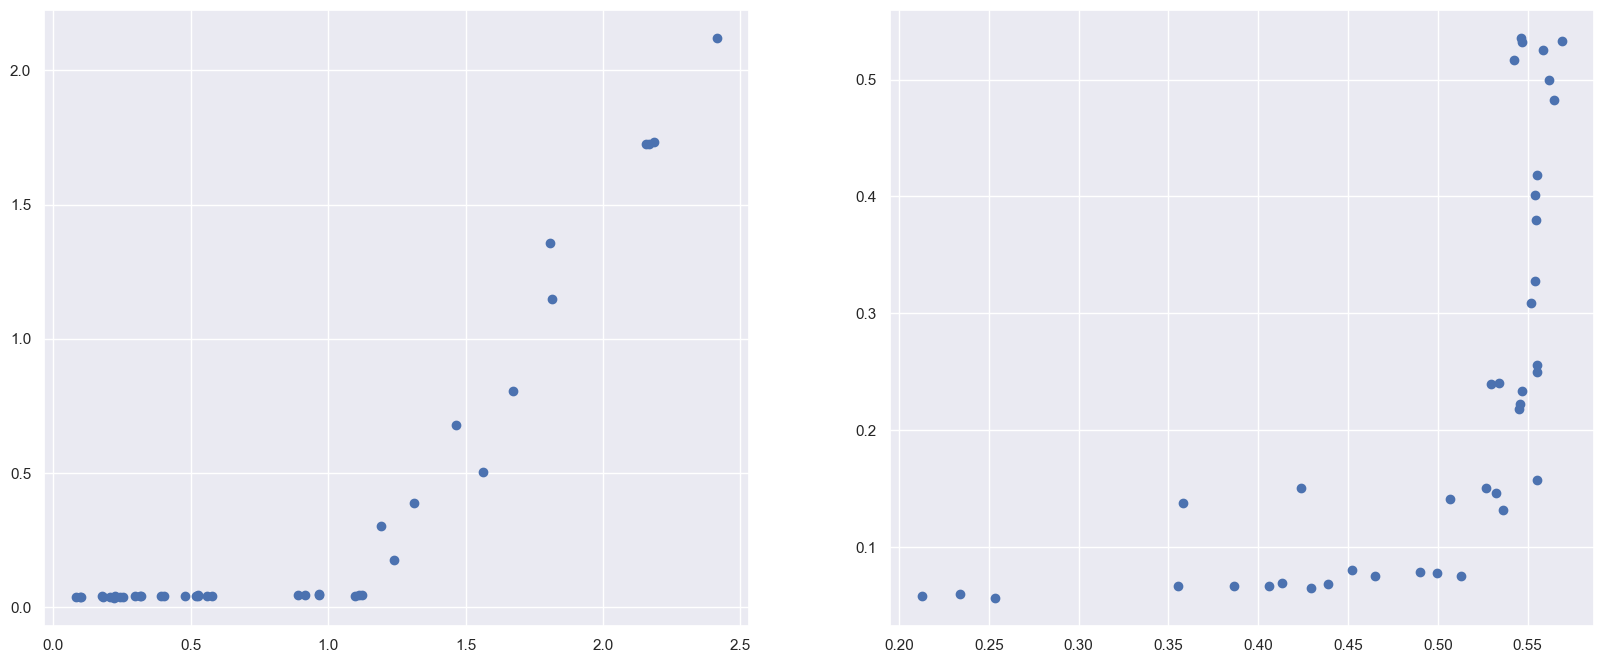

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(20,8))
ax1,ax2 = axs[0],axs[1]

ax1.scatter(rmsd_df["rmsd_ord"],stat_df["min_xray_rmsd_ord"])
ax2.scatter(rmsd_df["r_free"],stat_df["min_xray_r_free_0"])

plt.savefig(Path(Path.home(), "Desktop/natives_correlation.png"))